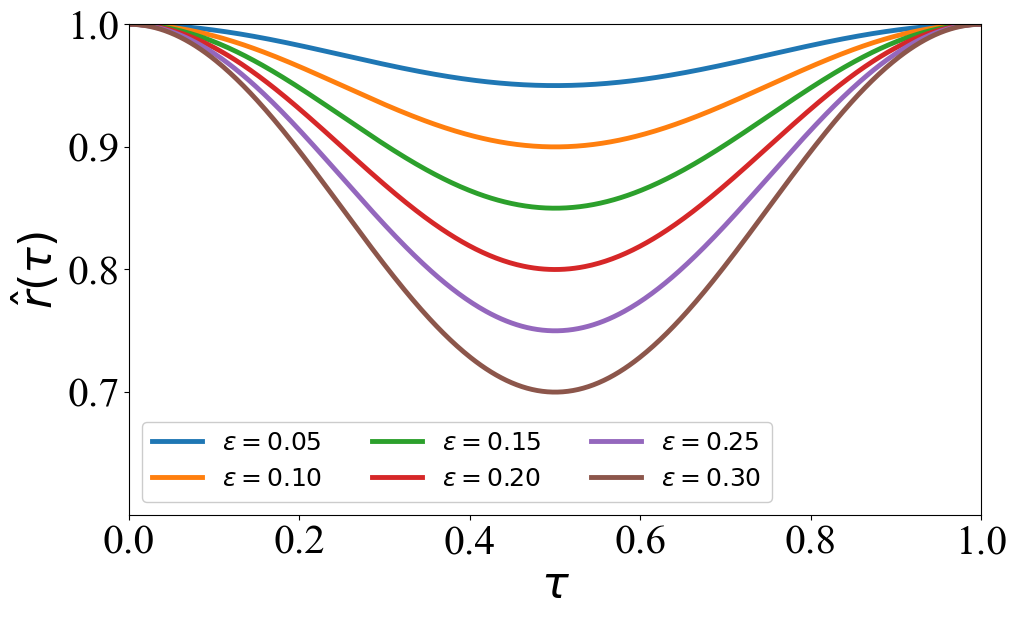

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nn = 1
epsilons = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
tau = np.linspace(0, 1, 500)

# Plotting
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))
for eps in epsilons:
    r_tau = 1 - eps * np.sin(nn * np.pi * tau)**2
    plt.plot(tau, r_tau, label=rf"$\epsilon = {eps:.2f}$", linewidth=3.5)

# Labels and formatting
plt.xlabel("$\\tau$", fontsize=32)
plt.ylabel("$\\hat{{r}}(\\tau)$", fontsize=32)
plt.xlim(0, 1)
plt.ylim(0.6, 1)
plt.xticks(fontsize=30)
yticks = [0.7, 0.8, 0.9, 1.0]
plt.yticks(ticks=yticks, labels=[f"{y:.1f}" for y in yticks], fontsize=30)
plt.legend(fontsize=18, loc='lower left', framealpha=1.0, ncol=3)
plt.grid(False)
plt.tight_layout(pad=0.1)
plt.savefig('figure11.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure11.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure11.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

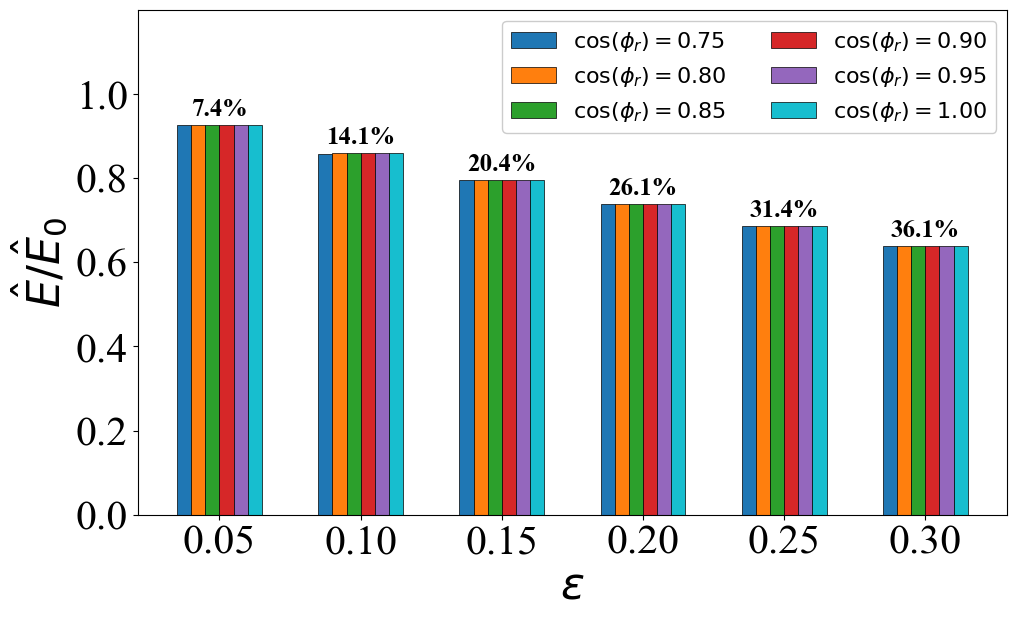

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
nn = 1
epsilons = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
delta_value = 0.05
cos_phi_r_list = np.arange(0.75, 1.01, 0.05)

# Speed profile
def r_hat(tau, eps):
    return 1 - eps * np.sin(nn * np.pi * tau)**2

# Storage
energy_matrix = np.zeros((len(epsilons), len(cos_phi_r_list)))
savings_matrix = np.zeros_like(energy_matrix)

# Compute energy and savings
for i, eps in enumerate(epsilons):
    for j, cos_phi_r in enumerate(cos_phi_r_list):
        def f_r(tau):
            r = r_hat(tau, eps)
            return r**3 * (cos_phi_r - delta_value * (1 - r))
        integral, _ = quad(f_r, 0, 1)
        E_by_E0 = integral / cos_phi_r
        energy_matrix[i, j] = E_by_E0
        savings_matrix[i, j] = (1 - E_by_E0) * 100

# Plotting
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']
bar_width = 0.1
x = np.arange(len(epsilons))
offsets = np.linspace(-bar_width*2.5, bar_width*2.5, len(cos_phi_r_list))

# Font config
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Create figure
plt.figure(figsize=(10, 6))
for j, (cos_phi_r, color, offset) in enumerate(zip(cos_phi_r_list, color_map, offsets)):
    bars = plt.bar(x + offset, energy_matrix[:, j], width=bar_width, color=color,
                   label=rf'$\cos(\phi_r) = {cos_phi_r:.2f}$', edgecolor='black', linewidth=0.5)

# Average savings annotation
average_savings = savings_matrix.mean(axis=1)
for i, avg in enumerate(average_savings):
    plt.text(x[i], energy_matrix[i].max() + 0.01, f"{avg:.1f}%", 
             ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')

# Axis labels and layout
plt.xlabel("$\\epsilon$", fontsize=32)
plt.ylabel("$\\hat{E}/\\hat{E}_0$", fontsize=32)
plt.ylim(0, 1.2)
plt.xticks(ticks=x, labels=[f"{e:.2f}" for e in epsilons], fontsize=30)
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks=yticks, fontsize=30)
plt.legend(fontsize=16, loc='upper right', framealpha=1.0, ncol=2)
plt.grid(False)
plt.tight_layout(pad=0.1)

# Save
plt.savefig('figure12.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure12.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure12.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

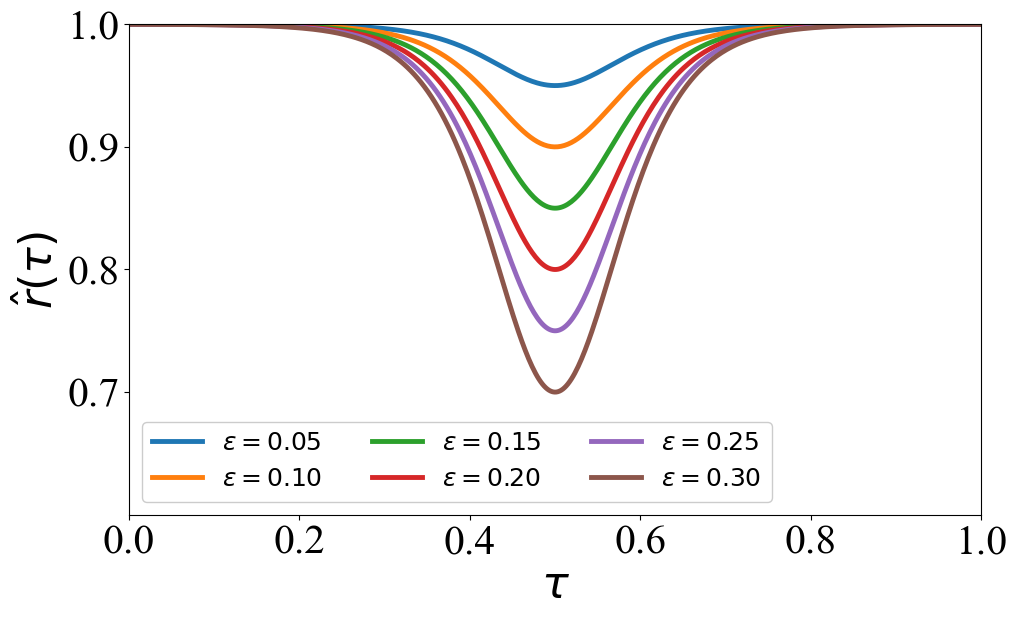

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilons = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
tau = np.linspace(0, 1, 500)
k = 10  # Steepness factor for tanh profile

# Symmetric tanh-based speed profile
def r_tau_tanh(tau, eps, k):
    return 1 - eps * (1 - np.tanh(k * (tau - 0.5))**2)

# Plotting settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10, 6))

# Plot each curve
for eps in epsilons:
    r_tau = r_tau_tanh(tau, eps, k)
    plt.plot(tau, r_tau, label=rf"$\epsilon = {eps:.2f}$", linewidth=3.5)

# Axis labels and ticks
plt.xlabel("$\\tau$", fontsize=32)
plt.ylabel("$\\hat{r}(\\tau)$", fontsize=32)
plt.xlim(0, 1)
plt.ylim(0.6, 1)
plt.xticks(fontsize=30)
yticks = [0.7, 0.8, 0.9, 1.0]
plt.yticks(ticks=yticks, labels=[f"{y:.1f}" for y in yticks], fontsize=30)

# Legend and layout
plt.legend(fontsize=18, loc='lower left', framealpha=1.0, ncol=3)
plt.grid(False)
plt.tight_layout(pad=0.1)

# Save figures
plt.savefig('figure13.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure13.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure13.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()

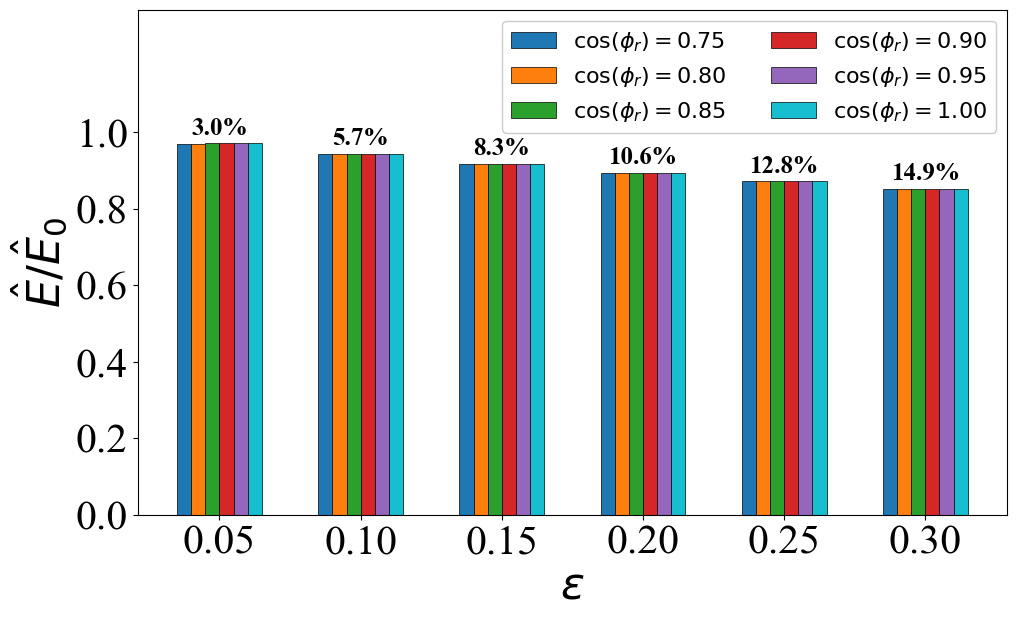

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
nn = 1
epsilons = np.array([0.05, 0.10, 0.15, 0.20, 0.25, 0.30])
delta_value = 0.05
cos_phi_r_list = np.arange(0.75, 1.01, 0.05)

# Speed profile using symmetric tanh dip
def r_hat(tau, eps, k=10):
    return 1 - eps * (1 - np.tanh(k * (tau - 0.5))**2)

# Storage
energy_matrix = np.zeros((len(epsilons), len(cos_phi_r_list)))
savings_matrix = np.zeros_like(energy_matrix)

# Compute energy and savings
for i, eps in enumerate(epsilons):
    for j, cos_phi_r in enumerate(cos_phi_r_list):
        def f_r(tau):
            r = r_hat(tau, eps)
            return r**3 * (cos_phi_r - delta_value * (1 - r))
        integral, _ = quad(f_r, 0, 1)
        E_by_E0 = integral / cos_phi_r
        energy_matrix[i, j] = E_by_E0
        savings_matrix[i, j] = (1 - E_by_E0) * 100

# Plotting
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']
bar_width = 0.1
x = np.arange(len(epsilons))
offsets = np.linspace(-bar_width*2.5, bar_width*2.5, len(cos_phi_r_list))

# Font config
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Create figure
plt.figure(figsize=(10, 6))
for j, (cos_phi_r, color, offset) in enumerate(zip(cos_phi_r_list, color_map, offsets)):
    bars = plt.bar(x + offset, energy_matrix[:, j], width=bar_width, color=color,
                   label=rf'$\cos(\phi_r) = {cos_phi_r:.2f}$', edgecolor='black', linewidth=0.5)

# Average savings annotation
average_savings = savings_matrix.mean(axis=1)
for i, avg in enumerate(average_savings):
    plt.text(x[i], energy_matrix[i].max() + 0.01, f"{avg:.1f}%", 
             ha='center', va='bottom', fontsize=18, fontweight='bold', color='black')

# Axis labels and layout
plt.xlabel("$\\epsilon$", fontsize=32)
plt.ylabel("$\\hat{E}/\\hat{E}_0$", fontsize=32)
plt.ylim(0, 1.32)
plt.xticks(ticks=x, labels=[f"{e:.2f}" for e in epsilons], fontsize=30)
yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(ticks=yticks, fontsize=30)
plt.legend(fontsize=16, loc='upper right', framealpha=1.0, ncol=2)
plt.grid(False)
plt.tight_layout(pad=0.1)

# Save
plt.savefig('figure14.pdf', format='pdf', dpi=1200, bbox_inches='tight')
plt.savefig('figure14.png', format='png', dpi=1200, bbox_inches='tight')
plt.savefig('figure14.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.show()